In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.9f' % x)
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
myLocator = mticker.MultipleLocator(3)

# data: 
#https://data.worldbank.org/indicator/IS.AIR.PSGR?end=2018&start=1970&view=chart
#https://data.worldbank.org/indicator/IS.AIR.DPRT?end=2018&start=1970&view=chart
#https://data.world/hhaveliw/airplane-crashes-1908-2009/workspace/file?filename=Airplane_Crashes_and_Fatalities_Since_1908.csv
#https://cdan.dot.gov/query
#https://www.transtats.bts.gov/Data_Elements_Financial.aspx?Data=6

In [2]:
airline_safety = pd.read_csv('./data/airline-safety.csv')

In [224]:
airline_safety

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


In [225]:
data = {'year_range':['1985 - 1999','2000 - 2014'], 
        'fatalities':[df['fatalities_85_99'].sum(),df['fatalities_00_14'].sum()]}
fatalities_by_chunk = pd.DataFrame(data=data)
fatalities_by_chunk

,year_range,fatalities
0,1985 - 1999,6295
1,2000 - 2014,3109


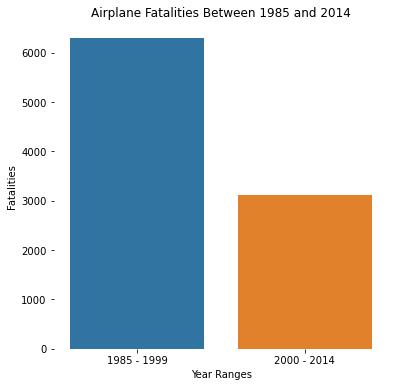

In [348]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)

sns.despine(bottom=True, left=True)
b = sns.barplot(x="year_range",y="fatalities", data=fatalities_by_chunk)
b.set_xlabel('Year Ranges')
b.set_ylabel('Fatalities')
b.set_title('Airplane Fatalities Between 1985 and 2014')
plt.savefig('bar.svg', format='svg')

In [369]:
#totals = pd.read_csv('./data/API_IS.AIR.DPRT_DS2_en_csv_v2_1346887.csv')
totals = pd.read_csv('./data/API_IS.AIR.PSGR_DS2_en_csv_v2_1345302.csv')

us_totals = totals[totals['Country Name']=='United States']
#totals.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis = 1, inplace=True)
#totals.replace(np.nan,0, inplace=True)
us_totals.drop(['Country Name','Country Code','Indicator Name','Indicator Code'], axis = 1, inplace=True)



c:\python\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


249   889022000.000000000
Name: 2018, dtype: float64

In [371]:
passengers = pd.DataFrame(us_totals.sum())

In [372]:
passengers

,0
1960,0.000000000
1961,0.000000000
1962,0.000000000
1963,0.000000000
1964,0.000000000
1965,0.000000000
1966,0.000000000
1967,0.000000000
1968,0.000000000
1969,0.000000000


In [373]:
# filter to years i want
passengers = passengers['1970':'2009']

# reset index
passengers.reset_index(inplace=True)


In [374]:
# Rename columns
passengers.columns = ['Year','Passengers']

# convert year column to integer
passengers['Year'] = pd.to_numeric(passengers['Year'])

<ipython-input-374-e11c5efcc21a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passengers['Year'] = pd.to_numeric(passengers['Year'])


In [375]:
passengers

,Year,Passengers
0,1970,163448992.000000000
1,1971,174143104.000000000
2,1972,191325408.000000000
3,1973,202309200.000000000
4,1974,207612400.000000000
5,1975,204900400.000000000
6,1976,223017296.000000000
7,1977,240144992.000000000
8,1978,273025504.000000000
9,1979,313624000.000000000


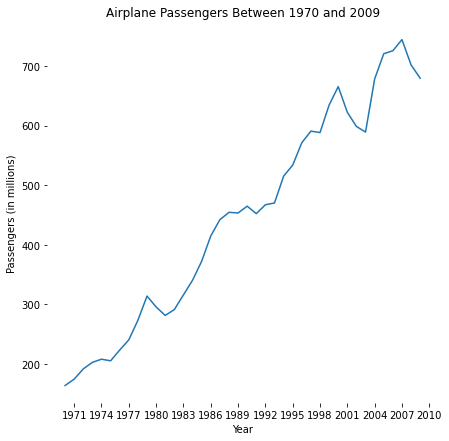

In [376]:

fig, ax = plt.subplots()
fig.set_size_inches(7,7)

sns.despine(bottom=True, left=True)
l = sns.lineplot(data=passengers,x="Year",y=passengers['Passengers']/1000000)
l.set_xlabel('Year')
l.set_ylabel('Passengers (in millions)')
l.set_title('Airplane Passengers Between 1970 and 2009')
ax.xaxis.set_major_locator(myLocator)
ax.ticklabel_format(style='plain',axis='y')
plt.savefig('airline_passengers.svg', format='svg')

In [67]:
crashes = pd.read_csv('./data/Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [68]:
crashes.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.000000000,1.000000000,0.000000000,"During a demonstration flight, a U.S. Army fly..."
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.000000000,5.000000000,0.000000000,First U.S. dirigible Akron exploded just offsh...
2,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.000000000,1.000000000,0.000000000,The first fatal airplane accident in Canada oc...
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.000000000,14.000000000,0.000000000,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.000000000,30.000000000,0.000000000,Hydrogen gas which was being vented was sucked...


In [69]:
# convert date field to date type
crashes['Date']= pd.to_datetime(crashes['Date']) 

# convert case of string for easy search
crashes.Operator = crashes.Operator.str.upper() 

In [70]:
# copy original dataset
non_mil = crashes.copy()

In [71]:
# let's concern ourselves with non-military
non_mil['military'] = non_mil['Operator'].str.contains('MILITARY')

In [72]:
non_mil = non_mil[non_mil['military']==False]

In [73]:
non_mil =non_mil[non_mil['Date'].dt.year>=1970]

In [291]:
fatal_line_data = non_mil.groupby(non_mil['Date'].dt.year)[['Fatalities']].sum()

In [292]:
fatal_line_data.reset_index(inplace=True)
fatal_line_data.columns = ['Year','Fatalities']

In [313]:
fatal_line_data

,Year,Fatalities
0,1970,1679.000000000
1,1971,1617.000000000
2,1972,2595.000000000
3,1973,2355.000000000
4,1974,2132.000000000
5,1975,1252.000000000
6,1976,1883.000000000
7,1977,1801.000000000
8,1978,1388.000000000
9,1979,1957.000000000


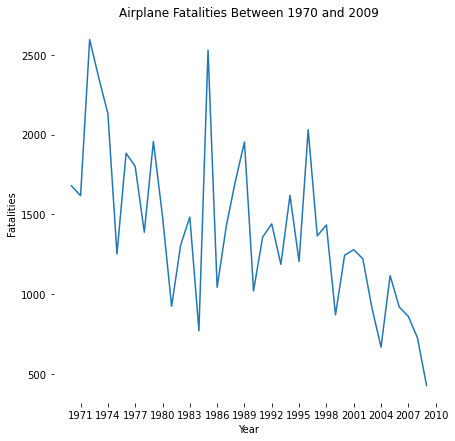

In [350]:

fig, ax = plt.subplots()
fig.set_size_inches(7,7)

sns.despine(bottom=True, left=True)
l = sns.lineplot(data=fatal_line_data,x="Year",y="Fatalities")
l.set_xlabel('Year')
l.set_ylabel('Fatalities')
l.set_title('Airplane Fatalities Between 1970 and 2009')
ax.xaxis.set_major_locator(myLocator)
ax.ticklabel_format(style='plain',axis='y')
plt.savefig('airline_fatalities.svg', format='svg')

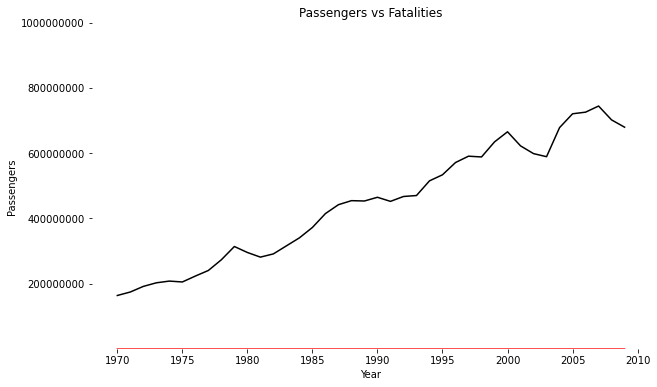

In [378]:
fig, ax1 = plt.subplots(figsize=(10,6))
#ax1 = sns.lineplot(data=passengers,x="Year",y=passengers['Passengers']/1000000,color='k')
ax1 = sns.lineplot(data=passengers,x="Year",y=passengers['Passengers'],color='k')
ax1.tick_params(axis='y')
ax2 = sns.lineplot(data=fatal_line_data,x="Year",y=fatal_line_data["Fatalities"],color='r',alpha=0.7) 
sns.despine(bottom=True, left=True)
ax1.ticklabel_format(style='plain')
ax1.set_title('Passengers vs Fatalities')
ax1.set_xlabel('Year')
ax1.set_ylabel('Passengers')
ax1.set_ylim(200,1000000000)
plt.savefig('passengers_v_fatalities.svg', format='svg')

In [327]:
accident_line_data = non_mil.groupby(non_mil['Date'].dt.year)[['Fatalities']].count()
accident_line_data.reset_index(inplace=True)
accident_line_data.rename(columns={"Date":"Year","Fatalities": "Accidents"},inplace=True)
accident_line_data

,Year,Accidents
0,1970,74
1,1971,58
2,1972,88
3,1973,80
4,1974,73
5,1975,63
6,1976,78
7,1977,69
8,1978,72
9,1979,85


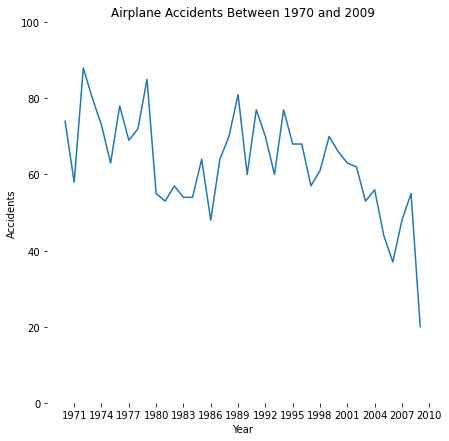

In [352]:


fig, ax = plt.subplots()
fig.set_size_inches(7,7)

sns.despine(bottom=True, left=True)
l = sns.lineplot(data=accident_line_data,x="Year",y="Accidents")
l.set_xlabel('Year')
l.set_ylabel('Accidents')
l.set_title('Airplane Accidents Between 1970 and 2009')
l.set_ylim(0,100)
ax.xaxis.set_major_locator(myLocator)
ax.ticklabel_format(style='plain',axis='y')

plt.savefig('airline_accidents.svg', format='svg')


In [174]:
car_totals = pd.read_csv('./data/Car_CrashReport_2004-2009.csv')

In [175]:
car_totals

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,2004,2939,2597,2877,3026,3438,3329,3499,3603,3254,3449,3145,3288,38444
1,2005,2817,2618,2885,3239,3318,3381,3761,3501,3424,3631,3436,3241,39252
2,2006,2931,2695,3042,3138,3345,3383,3527,3474,3348,3462,3168,3135,38648
3,2007,2732,2618,3092,3041,3312,3281,3460,3325,3235,3325,3066,2948,37435
4,2008,2575,2586,2549,2722,2887,3029,3018,3224,2860,3063,2829,2830,34172
5,2009,2377,2167,2349,2592,2780,2750,2787,2865,2650,2622,2512,2411,30862


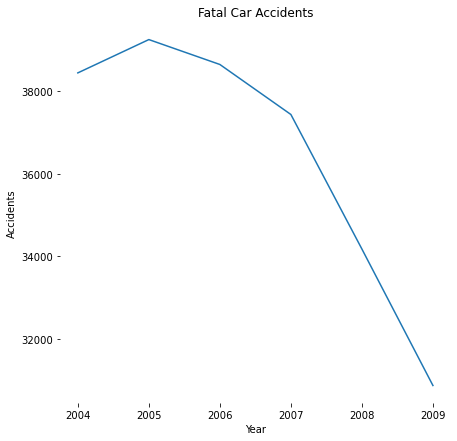

In [353]:

fig, ax = plt.subplots()
fig.set_size_inches(7,7)

sns.despine(bottom=True, left=True)
l = sns.lineplot(data=car_totals,x="Year",y="Total")
l.set_xlabel('Year')
l.set_ylabel('Accidents')
l.set_title('Fatal Car Accidents')
ax.ticklabel_format(style='plain',axis='y')

plt.savefig('fatal_car_accidents.svg', format='svg')

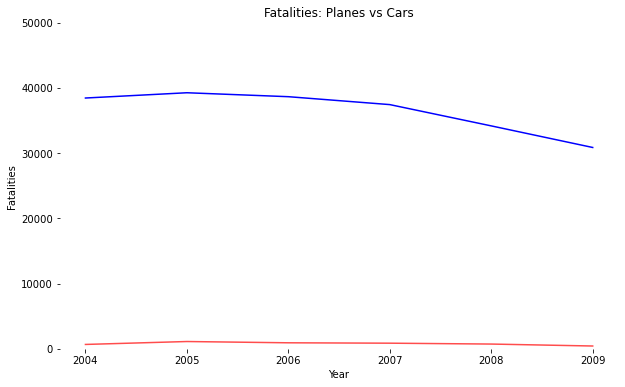

In [354]:
fig, ax1 = plt.subplots(figsize=(10,6))
#ax1 = sns.lineplot(data=fatal_line_data,x="Year",y=fatal_line_data["Fatalities"],color='k',alpha=0.7) 
ax1 = sns.lineplot(data=fatal_line_data,x=fatal_line_data[fatal_line_data["Year"]>=2004]['Year'],
                   y=fatal_line_data["Fatalities"],color='r',alpha=0.7) 
ax1.tick_params(axis='y')
ax2 = sns.lineplot(data=car_totals,x="Year",y="Total", color='b')
sns.despine(bottom=True, left=True)
ax1.ticklabel_format(style='plain')
ax1.set_title('Fatalities: Planes vs Cars')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fatalities')
ax1.set_ylim(0,50000)

plt.savefig('fatalaties_plane_v_car.svg', format='svg')

In [96]:
car_all_totals = pd.read_csv('./data/Car_CrashReport_2004-2009-all.csv')

In [194]:
car_all_totals

,Year,Type,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,2004,Fatal,2939,2597,2877,3026,3438,3329,3499,3603,3254,3449,3145,3288,38444
1,2005,Fatal,2817,2618,2885,3239,3318,3381,3761,3501,3424,3631,3436,3241,39252
2,2006,Fatal,2931,2695,3042,3138,3345,3383,3527,3474,3348,3462,3168,3135,38648
3,2007,Fatal,2732,2618,3092,3041,3312,3281,3460,3325,3235,3325,3066,2948,37435
4,2008,Fatal,2575,2586,2549,2722,2887,3029,3018,3224,2860,3063,2829,2830,34172
5,2009,Fatal,2377,2167,2349,2592,2780,2750,2787,2865,2650,2622,2512,2411,30862
6,2004,Injury only,146514,143531,153775,150159,160043,157160,154697,156825,155541,161871,157861,163641,1861617
7,2005,Injury only,144729,136802,156026,151798,159949,158124,153022,158751,151567,152050,141436,151851,1816105
8,2006,Injury only,147436,133891,140562,142391,148030,144548,138235,142457,142256,165041,150059,151016,1745924
9,2007,Injury only,136173,134597,142221,137741,148614,148120,141933,140750,138291,153732,144637,144495,1711304


In [198]:
car_all_total_linedata = car_all_totals.groupby(car_all_totals['Year'])[['Total']].sum()
car_all_total_linedata.reset_index(inplace=True)

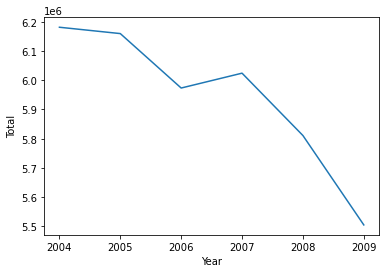

In [199]:
sns.lineplot(data=car_all_total_linedata,x="Year",y="Total")

In [3]:
netincome = pd.read_csv('./data/net_income_by_quarter.csv')

In [4]:
netincome

,Year,Quarter,DOMESTIC,LATIN AMERICA,ATLANTIC,PACIFIC,INTERNATIONAL,TOTAL
0,2000,1,"139,162","58,927","-68,918","-106,308",839,"23,702"
1,2000,2,"1,570,500","-86,040","250,371","154,724","9,541","1,899,096"
2,2000,3,"548,903","33,056","226,224","83,675","45,470","937,327"
3,2000,4,"-267,068","6,639","-95,916","5,533","23,388","-327,425"
4,2000,TOTAL,"1,991,496","12,581","311,761","137,623","79,238","2,532,700"
...,...,...,...,...,...,...,...,...
98,2019,4,"3,736,832","465,079","-76,833","-340,004","-192,926","3,592,149"
99,2019,TOTAL,"15,732,917","1,549,883","378,323","-950,769","-252,138","16,458,216"
100,2020,1,"-3,218,747","-251,044","-924,756","-553,586","13,600","-4,934,532"
101,2020,2,"-8,053,484","-432,400","-1,134,773","-720,025","381,629","-9,959,053"


In [39]:
netincome_yearly = netincome[netincome['Quarter']=='TOTAL']

In [40]:
netincome_yearly.reset_index(inplace=True)
netincome_yearly.drop('index',axis=1, inplace=True)
netincome_yearly

c:\python\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Year,Quarter,DOMESTIC,LATIN AMERICA,ATLANTIC,PACIFIC,INTERNATIONAL,TOTAL
0,2000,TOTAL,"1,991,496","12,581","311,761","137,623","79,238","2,532,700"
1,2001,TOTAL,"-7,234,855","10,499","-182,509","-768,656","-90,989","-8,266,509"
2,2002,TOTAL,"-9,329,102","-436,783","-1,029,513","-491,717","-78,369","-11,365,484"
3,2003,TOTAL,"-1,469,581","285,808","116,463","-651,702","3,543","-1,715,469"
4,2004,TOTAL,"-9,906,154","313,825","407,530","-71,523","151,897","-9,104,424"
5,2005,TOTAL,"-19,747,536","-720,181","-2,109,279","-4,833,816","190,916","-27,219,896"
6,2006,TOTAL,"9,043,659","1,464,063","3,188,145","4,352,204","138,042","18,186,112"
7,2007,TOTAL,"2,995,875","1,135,327","2,048,328","1,321,476","190,398","7,691,404"
8,2008,TOTAL,"-18,173,970","-415,249","-3,276,511","-1,662,522","-221,582","-23,749,834"
9,2009,TOTAL,"-2,252,074","404,667","-634,577","-213,634","169,340","-2,526,277"


In [41]:
netincome_yearly['TOTAL'] = netincome_yearly['TOTAL'].str.replace(',', '').astype(int)

<ipython-input-41-9879dbe77556>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netincome_yearly['TOTAL'] = netincome_yearly['TOTAL'].str.replace(',', '').astype(int)


In [42]:
netincome_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           21 non-null     int64 
 1   Quarter        21 non-null     object
 2   DOMESTIC       21 non-null     object
 3   LATIN AMERICA  21 non-null     object
 4   ATLANTIC       21 non-null     object
 5   PACIFIC        21 non-null     object
 6   INTERNATIONAL  21 non-null     object
 7   TOTAL          21 non-null     int32 
dtypes: int32(1), int64(1), object(6)
memory usage: 1.4+ KB


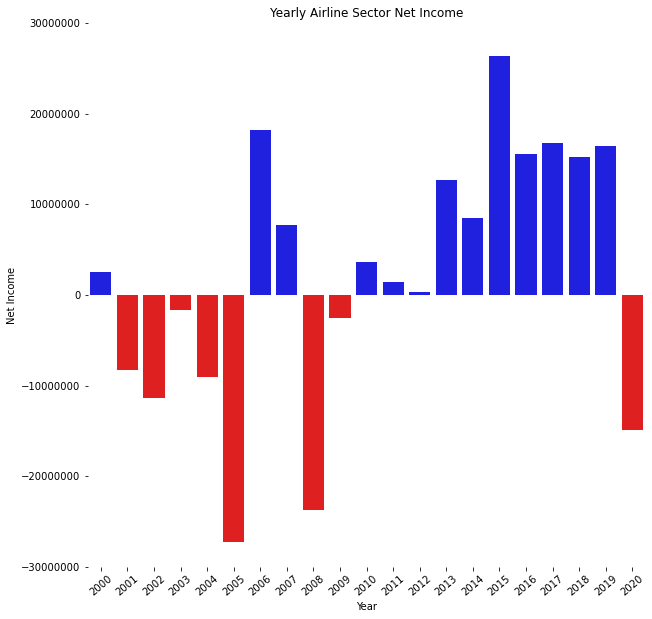

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

colormat = np.where(netincome_yearly['TOTAL']>0,'blue','red')

sns.despine(bottom=True, left=True)
l = sns.barplot(data=netincome_yearly,x="Year",y="TOTAL", palette=colormat)
l.set_xlabel('Year')
l.set_ylabel('Net Income')
l.set_title('Yearly Airline Sector Net Income')
l.set_ylim(-30000000,30000000)
l.set_xticklabels(l.get_xticklabels(),rotation=40)
ax.ticklabel_format(style='plain',axis='y')

plt.savefig('yearly_airline_sector_income.svg', format='svg')

In [18]:
netincome[netincome['Quarter']=='TOTAL']

,Year,Quarter,DOMESTIC,LATIN AMERICA,ATLANTIC,PACIFIC,INTERNATIONAL,TOTAL
4,2000,TOTAL,"1,991,496","12,581","311,761","137,623","79,238","2,532,700"
9,2001,TOTAL,"-7,234,855","10,499","-182,509","-768,656","-90,989","-8,266,509"
14,2002,TOTAL,"-9,329,102","-436,783","-1,029,513","-491,717","-78,369","-11,365,484"
19,2003,TOTAL,"-1,469,581","285,808","116,463","-651,702","3,543","-1,715,469"
24,2004,TOTAL,"-9,906,154","313,825","407,530","-71,523","151,897","-9,104,424"
29,2005,TOTAL,"-19,747,536","-720,181","-2,109,279","-4,833,816","190,916","-27,219,896"
34,2006,TOTAL,"9,043,659","1,464,063","3,188,145","4,352,204","138,042","18,186,112"
39,2007,TOTAL,"2,995,875","1,135,327","2,048,328","1,321,476","190,398","7,691,404"
44,2008,TOTAL,"-18,173,970","-415,249","-3,276,511","-1,662,522","-221,582","-23,749,834"
49,2009,TOTAL,"-2,252,074","404,667","-634,577","-213,634","169,340","-2,526,277"


In [74]:
fatal_data = non_mil.groupby(non_mil['Date'].dt.year)[['Fatalities','Aboard']].sum()

In [76]:
fatal_data.reset_index(inplace=True)
fatal_data.columns = ['Year','Fatalities','Aboard']

In [156]:
fatal_data['Proportion'] = fatal_data['Fatalities'] / fatal_data['Aboard']

In [157]:
fatal_data

,Year,Fatalities,Aboard,Proportion
0,1970,1679.000000000,2294.000000000,0.731909329
1,1971,1617.000000000,2248.000000000,0.719306050
2,1972,2595.000000000,3253.000000000,0.797725177
3,1973,2355.000000000,3300.000000000,0.713636364
4,1974,2132.000000000,2873.000000000,0.742081448
5,1975,1252.000000000,1746.000000000,0.717067583
6,1976,1883.000000000,2422.000000000,0.777456647
7,1977,1801.000000000,2253.000000000,0.799378606
8,1978,1388.000000000,2545.000000000,0.545383104
9,1979,1957.000000000,2403.000000000,0.814398668


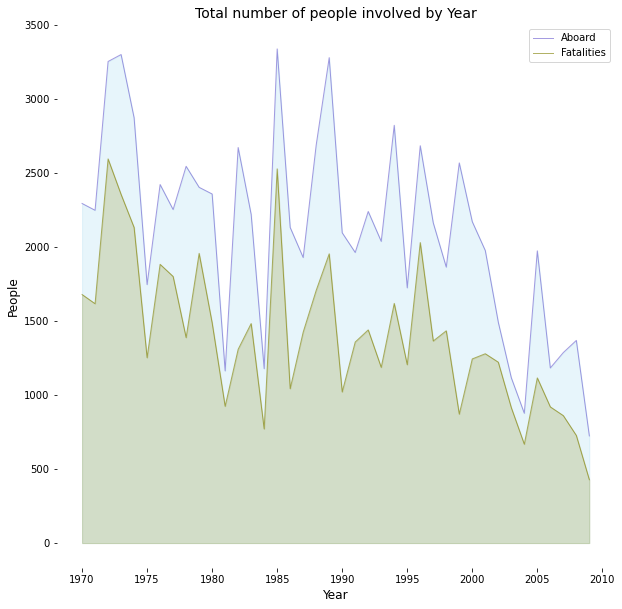

In [152]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

pal = sns.color_palette("colorblind")
sns.despine(bottom=True, left=True)

ax.fill_between(fatal_data['Year'], 'Aboard', data=fatal_data, color="skyblue", alpha=0.2)
ax.plot(fatal_data['Year'], 'Aboard', data=fatal_data, color="Slateblue", alpha=0.6, linewidth=1)
ax.fill_between(fatal_data['Year'], 'Fatalities', data=fatal_data, color="olive", alpha=0.2)
ax.plot(fatal_data['Year'], 'Fatalities', data=fatal_data, color="olive", alpha=0.6, linewidth=1)
ax.legend(fontsize=10)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('People', fontsize=12)
ax.set_title('Total number of people involved by Year', loc='Center', fontsize=14)
plt.savefig('people_involved_airline.svg', format='svg')

In [101]:
car_passenger_totals = pd.read_csv('./data/Car_CrashReport_passengers_2004-2018-all.csv')

In [104]:
car_agg = car_passenger_totals.groupby(['Year','Type'])[['Total']].sum().reset_index()

In [111]:
car_pivot = car_agg.pivot(index="Year", columns="Type", values="Total").reset_index()

In [112]:
car_pivot

Type,Year,Fatal,Injury,Property
0,2004,100760,5210351,10060366
1,2005,101262,4976122,10115421
2,2006,98356,4770860,9850183
3,2007,94338,4624743,9898964
4,2008,84510,4345369,9511491
5,2009,76510,4148878,9180010
6,2010,74863,4209724,8958637
7,2011,73364,4130806,8704926
8,2012,76436,4424039,9157227
9,2013,74331,4382610,9337920


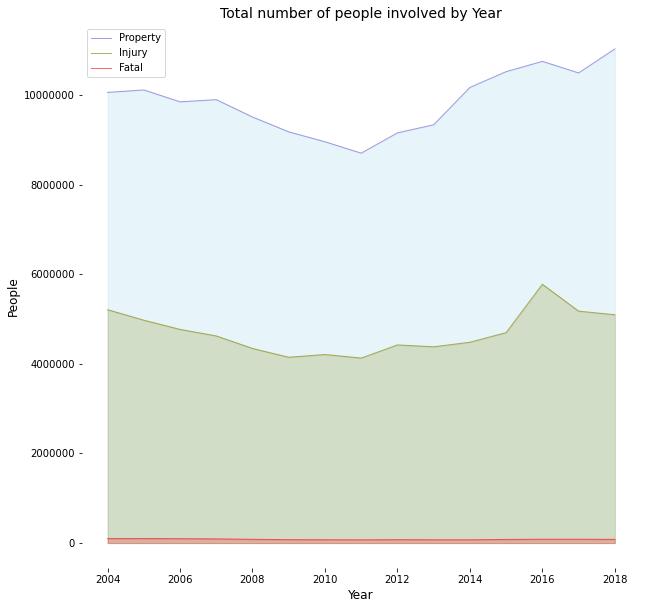

In [154]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
83,626
sns.despine(bottom=True, left=True)

ax.fill_between('Year', 'Property', data=car_pivot, color="skyblue", alpha=0.2)
ax.plot('Year', 'Property', data=car_pivot, color="Slateblue", alpha=0.6, linewidth=1)

ax.fill_between('Year', 'Injury', data=car_pivot, color="olive", alpha=0.2)
ax.plot('Year', 'Injury', data=car_pivot, color="olive", alpha=0.6, linewidth=1)

ax.fill_between('Year', 'Fatal', data=car_pivot, color="red", alpha=0.2)
ax.plot('Year', 'Fatal', data=car_pivot, color="red", alpha=0.6, linewidth=1)


ax.legend(fontsize=10)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('People', fontsize=12)
ax.set_title('Total number of people involved by Year', loc='Center', fontsize=14)
ax.ticklabel_format(style='plain',axis='y')
plt.savefig('people_involved_car.svg', format='svg')

In [118]:
accident_flight_hours = pd.read_excel(io='./data/AviationAccidentStatistics_1999-2018_20191101.xlsx',
                                     sheet_name='Table 9',
                                     header=[5],
                                     nrows=20,
                                     thousands=',')

In [119]:
accident_flight_hours

,Year,Unnamed: 1,All,Fatal,Total,Aboard,"Flight Hoursb,c",All.1,Fatal.1
0,1999,nan,74,12,38,38,3204000,2.309612984,0.374531835
1,2000,nan,80,22,71,68,3930000,2.035623410,0.559796438
2,2001,nan,72,18,60,59,2997000,2.402402402,0.600600601
3,2002,nan,60,18,35,35,2911000,2.061147372,0.618344212
4,2003,nan,73,18,42,40,2927000,2.494021182,0.614964127
5,2004,nan,66,23,64,63,3238000,2.038295244,0.710315009
6,2005,nan,65,11,18,16,3814671,1.703947732,0.288360385
7,2006,nan,52,10,16,16,3742230,1.389545806,0.267220347
8,2007,nan,61,14,43,43,4033313,1.512404319,0.347109188
9,2008,nan,58,20,69,69,3204726,1.809827112,0.624078314


In [122]:
accident_flight_hours.drop('Unnamed: 1', axis=1,inplace=True)

In [127]:
accident_flight_hours.rename({'All':'All_Accidents',
                              'Fatal':'Fatal_Accidents',
                             'Total':'Total_Fatalities',
                             'Aboard':'Passengers_Aboard',
                             'Flight Hoursb,c':'Flight Hours',
                              'All.1':'Accidents_per_100k',
                              'Fatal.1':'Fatal_Accidents_per_100k'
                             }, axis=1, inplace=True)

In [128]:
accident_flight_hours

,Year,All_Accidents,Fatal_Accidents,Total_Fatalities,Passengers_Aboard,Flight Hours,Accidents_per_100k,Fatal_Accidents_per_100k
0,1999,74,12,38,38,3204000,2.309612984,0.374531835
1,2000,80,22,71,68,3930000,2.035623410,0.559796438
2,2001,72,18,60,59,2997000,2.402402402,0.600600601
3,2002,60,18,35,35,2911000,2.061147372,0.618344212
4,2003,73,18,42,40,2927000,2.494021182,0.614964127
5,2004,66,23,64,63,3238000,2.038295244,0.710315009
6,2005,65,11,18,16,3814671,1.703947732,0.288360385
7,2006,52,10,16,16,3742230,1.389545806,0.267220347
8,2007,61,14,43,43,4033313,1.512404319,0.347109188
9,2008,58,20,69,69,3204726,1.809827112,0.624078314


In [129]:
accident_flight_hours.at[19,'Year'] = 2018

In [134]:
accident_flight_hours.drop(accident_flight_hours[accident_flight_hours['Year'] == 2011].index, inplace = True) 

In [142]:
accident_flight_hours['Accidents_per_100k'] = accident_flight_hours['Accidents_per_100k'].astype(float)

In [150]:
#accident_flight_hours['Year'] = accident_flight_hours['Year'].astype(int)
accident_flight_hours['Year'] = pd.to_datetime(accident_flight_hours['Year'], format='%Y')

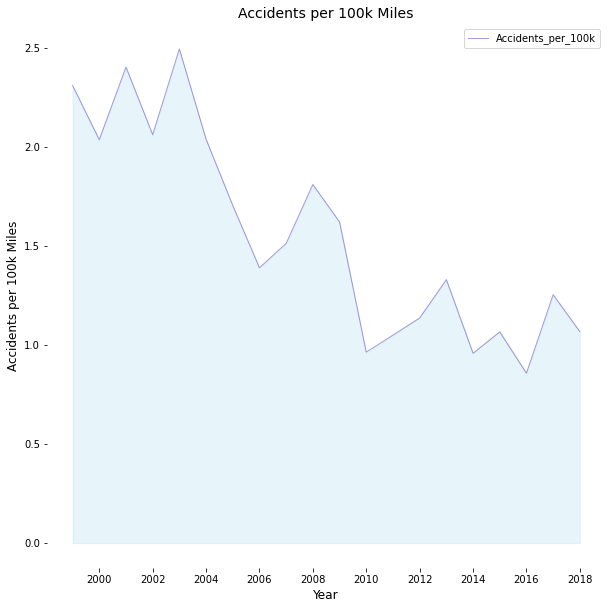

In [151]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

sns.despine(bottom=True, left=True)

ax.fill_between(accident_flight_hours['Year'], 
                round(accident_flight_hours['Accidents_per_100k'],2), 
                data=accident_flight_hours, color="skyblue", alpha=0.2)

ax.plot('Year', 'Accidents_per_100k', data=accident_flight_hours, color="Slateblue", alpha=0.6, linewidth=1)
ax.legend(fontsize=10)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Accidents per 100k Miles', fontsize=12)
ax.set_title('Accidents per 100k Miles', loc='Center', fontsize=14)
ax.ticklabel_format(style='plain',axis='y')
plt.savefig('accidents_per100k.svg', format='svg')

In [177]:
passbym = pd.read_csv('./data/passengers_by_quarter.csv', thousands=',')

In [178]:
passtot = passbym[passbym['Month']=='TOTAL']

In [179]:
passtot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 3 to 231
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           19 non-null     int64 
 1   Month          19 non-null     object
 2   DOMESTIC       19 non-null     int64 
 3   INTERNATIONAL  19 non-null     int64 
 4   TOTAL          19 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 912.0+ bytes


In [221]:
passtot

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
3,2002-01-01,TOTAL,551899643,60878039,612777682
16,2003-01-01,TOTAL,583293762,60941211,644234973
29,2004-01-01,TOTAL,629768486,70462241,700230727
42,2005-01-01,TOTAL,657261487,77843181,735104668
55,2006-01-01,TOTAL,658362617,82735582,741098199
68,2007-01-01,TOTAL,679168758,87457824,766626582
81,2008-01-01,TOTAL,651709940,88750993,740460933
94,2009-01-01,TOTAL,618052278,83112177,701164455
107,2010-01-01,TOTAL,629537424,88206632,717744056
120,2011-01-01,TOTAL,638247232,90121065,728368297


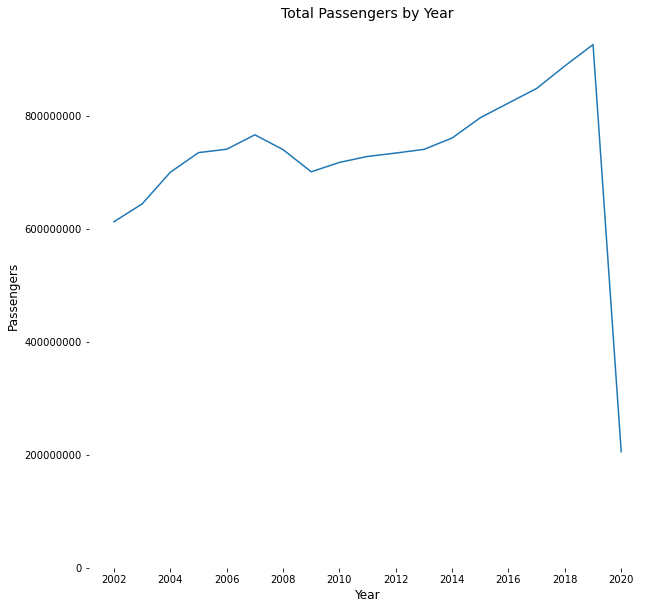

In [220]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
612,777,682
sns.despine(bottom=True, left=True)
b = sns.lineplot(data=passtot,x="Year",y="TOTAL", palette="colorblind")
b.set_xlabel('Year', fontsize=12)
b.set_ylabel('Passengers', fontsize=12)
b.set_title('Total Passengers by Year', fontsize=14)
b.set_ylim(0)
#b.set_xticklabels(l.get_xticklabels(),rotation=40)
ax.ticklabel_format(style='plain',axis='y')

plt.savefig('yearly_passenger_total.svg', format='svg')

In [193]:
employment = pd.read_csv('./data/airline_employment_totals.csv', thousands=',')

In [194]:
employment

,Month,Year,Full-time,Part-time,Grand Total
0,1,1990,494996,67200,562196
1,2,1990,496152,67771,563923
2,3,1990,500164,67316,567480
3,4,1990,505083,66239,571322
4,5,1990,509853,66547,576400
...,...,...,...,...,...
363,4,2020,606103,110590,716693
364,5,2020,589475,107762,697237
365,6,2020,588621,111102,699723
366,7,2020,597982,108842,706824


In [211]:
year_end_employment = employment[(employment['Month']==12) & (employment['Year'] >= 2002) ]

In [212]:
year_end_employment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 155 to 359
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Month        18 non-null     int64
 1   Year         18 non-null     int64
 2   Full-time    18 non-null     int64
 3   Part-time    18 non-null     int64
 4   Grand Total  18 non-null     int64
dtypes: int64(5)
memory usage: 864.0 bytes


In [213]:
year_end_employment

,Month,Year,Full-time,Part-time,Grand Total
155,12,2002,544358,104863,649221
167,12,2003,509751,102216,611967
179,12,2004,514247,110537,624784
191,12,2005,496495,114512,611007
203,12,2006,488233,114591,602824
215,12,2007,504616,116555,621171
227,12,2008,483204,104095,587299
239,12,2009,462455,101234,563689
251,12,2010,467915,100231,568146
263,12,2011,482402,100961,583363


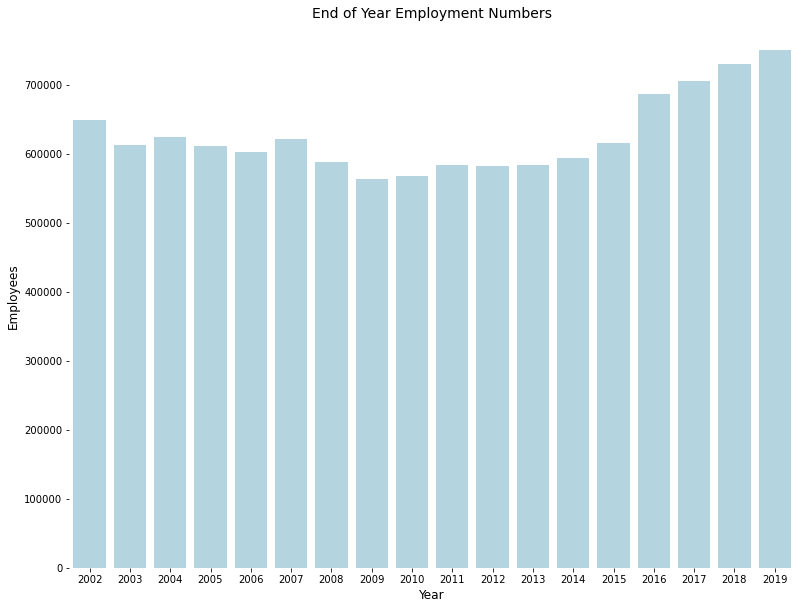

In [224]:
fig, ax = plt.subplots()
fig.set_size_inches(13,10)

sns.despine(bottom=True, left=True)
b = sns.barplot(data=year_end_employment,x="Year",y="Grand Total", color="lightblue")
b.set_xlabel('Year', fontsize=12)
b.set_ylabel('Employees', fontsize=12)
b.set_title('End of Year Employment Numbers', fontsize=14)
b.set_ylim(0)
#b.set_xticklabels(l.get_xticklabels(),rotation=40)
ax.ticklabel_format(style='plain',axis='y')

plt.savefig('eoy_employment.svg', format='svg')